## Steps to be followed for building a model

1. Reading, understanding and visualizing the data
2. Preparing the data for modeling (train-test split, rescalling etc)
3. Training the model
4. Residual analysis
5. Prediction and evaluation on test dataset

In [2]:
# import libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

### Reading and understanding the data



In [3]:
bike_rentals = pd.read_csv("/content/drive/MyDrive/Upgrad Masters/Linear Regression/Multi Regression Case Study/day.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the dimentions of the dataframe

bike_rentals.shape

(730, 16)

In [5]:
# From the info we can see that there are no null values in any of the columns so we don't have to deal with it.

bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check the descriptive information

bike_rentals.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Preparing data for modelling

1. Encoding
 - Converting binary categorical variables to 1 and 0
 - Other categorical variables to dummy variables

2. Splitting data into train and test
3. Rescaling of variables

In [7]:
# Checking for duplicates and dropping the entire duplicate row if any
bike_rentals.drop_duplicates(subset=None, inplace=True)

In [8]:
# No duplicates found and so the shape remains the same
bike_rentals.shape

(730, 16)

In [9]:
### Dropping unnessary columns

# - Instant: It's just an index
# - dteday: We already have year month and weekday so we don't need dteday
# - casual and registered: This is a segregation of the cnt variable and thus we don't require it.

bike_rentals = bike_rentals.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
bike_rentals.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bike_rentals.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Convert to 'category' data type

bike_rentals['season']=bike_rentals['season'].astype('category')
bike_rentals['weathersit']=bike_rentals['weathersit'].astype('category')
bike_rentals['mnth']=bike_rentals['mnth'].astype('category')
bike_rentals['weekday']=bike_rentals['weekday'].astype('category')

In [12]:
# Renaming a categorical variable so that we can understand it better

# 1. Weathersit

bike_rentals['weathersit'] = bike_rentals['weathersit'].map({1: 'weather1', 2: 'weather2', 3: 'weather3', 4: 'weather4'})
bike_rentals.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,weather2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,weather2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,weather1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,weather1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,weather1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# 2. Weekday

bike_rentals['weekday'] = bike_rentals['weekday'].map({0: 'weekday0', 1: 'weekday1', 2: 'weekday2', 3: 'weekday3', 4: 'weekday4', 5: 'weekday5', 6: 'weekday6'})
bike_rentals.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,weekday6,0,weather2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,weekday0,0,weather2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,weekday1,1,weather1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,weekday2,1,weather1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,weekday3,1,weather1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# 3. Mnth

bike_rentals['mnth'] = bike_rentals['mnth'].map({1: 'mnth1', 2: 'mnth2', 3: 'mnth3', 4: 'mnth4', 5: 'mnth5', 6: 'mnth6', 7: 'mnth7', 8: 'mnth8', 9: 'mnth9', 10: 'mnth10', 11: 'mnth11', 12: 'mnth12'})
bike_rentals.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,mnth1,0,weekday6,0,weather2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,mnth1,0,weekday0,0,weather2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,mnth1,0,weekday1,1,weather1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,mnth1,0,weekday2,1,weather1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,mnth1,0,weekday3,1,weather1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# 4. Season
bike_rentals['season'] = bike_rentals['season'].map({1: 'season1', 2: 'season2', 3: 'season3', 4: 'season4'})
bike_rentals.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,season1,0,mnth1,0,weekday6,0,weather2,14.110847,18.18125,80.5833,10.749882,985
1,season1,0,mnth1,0,weekday0,0,weather2,14.902598,17.68695,69.6087,16.652113,801
2,season1,0,mnth1,0,weekday1,1,weather1,8.050924,9.47025,43.7273,16.636703,1349
3,season1,0,mnth1,0,weekday2,1,weather1,8.200000,10.60610,59.0435,10.739832,1562
4,season1,0,mnth1,0,weekday3,1,weather1,9.305237,11.46350,43.6957,12.522300,1600


Create Dummy variables

In [16]:
# Create a dummy variable for categorical variables
# 1. season
dummy_season = pd.get_dummies(bike_rentals["season"], drop_first=True)
dummy_season.head()

,season2,season3,season4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [17]:
# 2. weathersit

dummy_weather = pd.get_dummies(bike_rentals["weathersit"], drop_first=True)
dummy_weather.head()

,weather2,weather3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [18]:
# 3. weekday

dummy_weekday = pd.get_dummies(bike_rentals["weekday"], drop_first=True)
dummy_weekday.head()

,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [19]:
# 4. mnth

dummy_mnth = pd.get_dummies(bike_rentals["mnth"], drop_first=True)
dummy_mnth.head()

,mnth2,mnth3,mnth4,mnth5,mnth6,mnth7,mnth8,mnth9,mnth10,mnth11,mnth12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# concat dummy variable with our dataframe

bike_rentals = pd.concat([bike_rentals, dummy_season, dummy_weather, dummy_mnth, dummy_weekday], axis=1)
bike_rentals.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth9,mnth10,mnth11,mnth12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6
0,season1,0,mnth1,0,weekday6,0,weather2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,0,1
1,season1,0,mnth1,0,weekday0,0,weather2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,0,0
2,season1,0,mnth1,0,weekday1,1,weather1,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,season1,0,mnth1,0,weekday2,1,weather1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,season1,0,mnth1,0,weekday3,1,weather1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0


In [21]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
 12  season2     730 non-null    uint8   
 13  season3     730 non-null    uint8   
 14  season4     730 non-null    uint8   
 15  weather2    730 non-null    uint8   
 16  weather3    730 non-null    uint8   
 17  mnth2       730 non-null    uint8   
 18  mnth3       730 non-null    uint8   
 19  mnth4   

Visualising the data

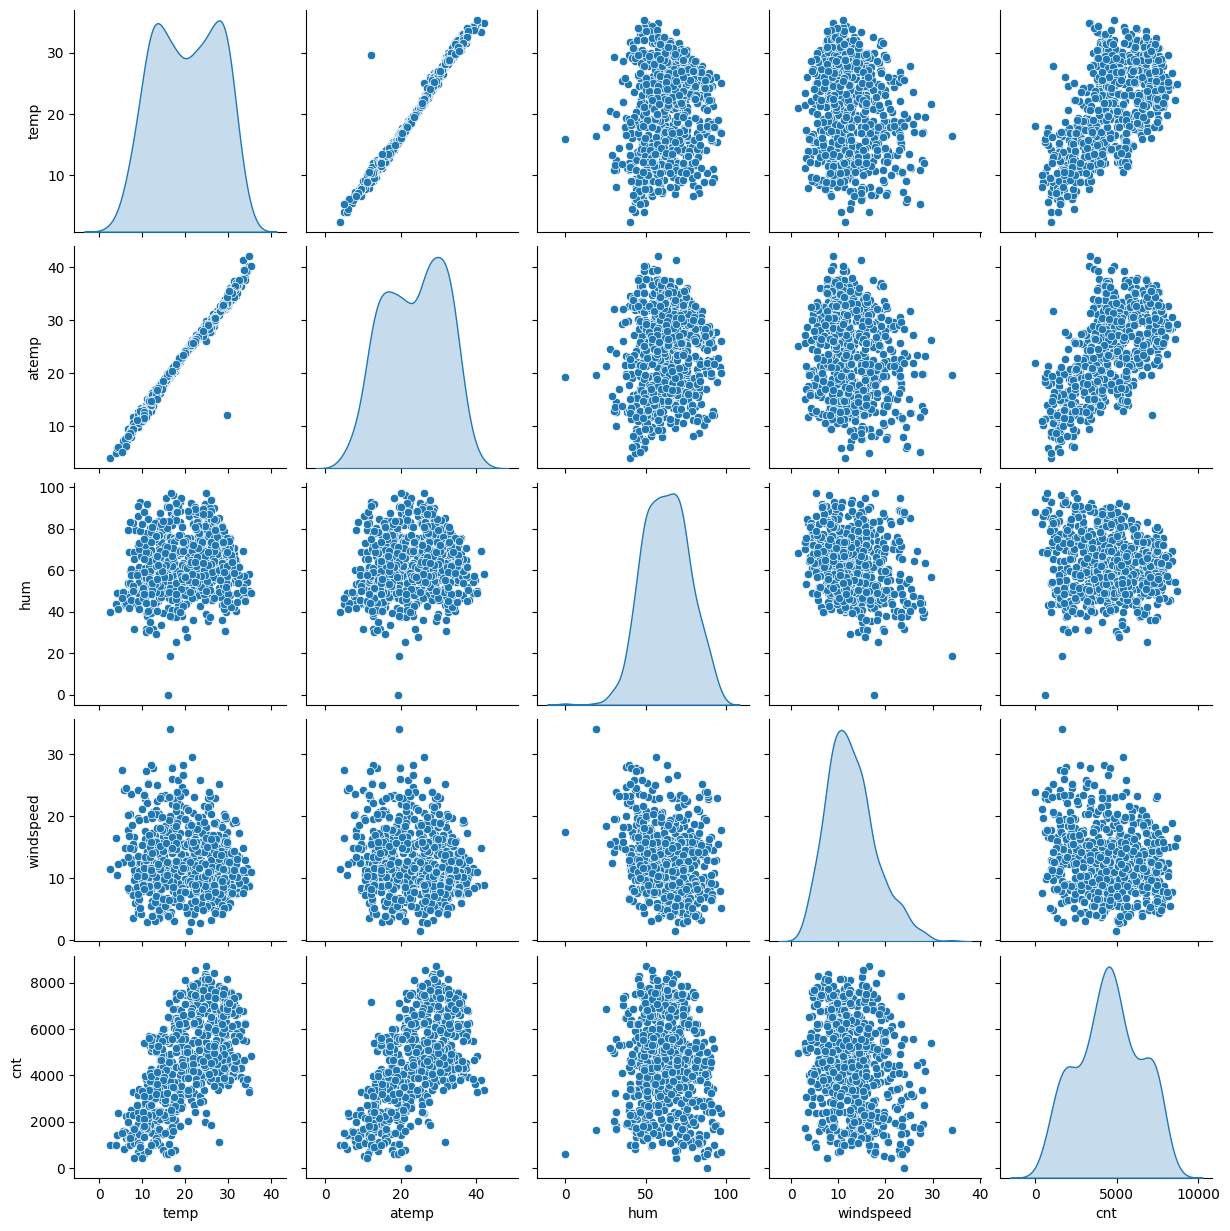

In [22]:
# Create a new dataframe of only numeric variables:

bike_num= bike_rentals[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

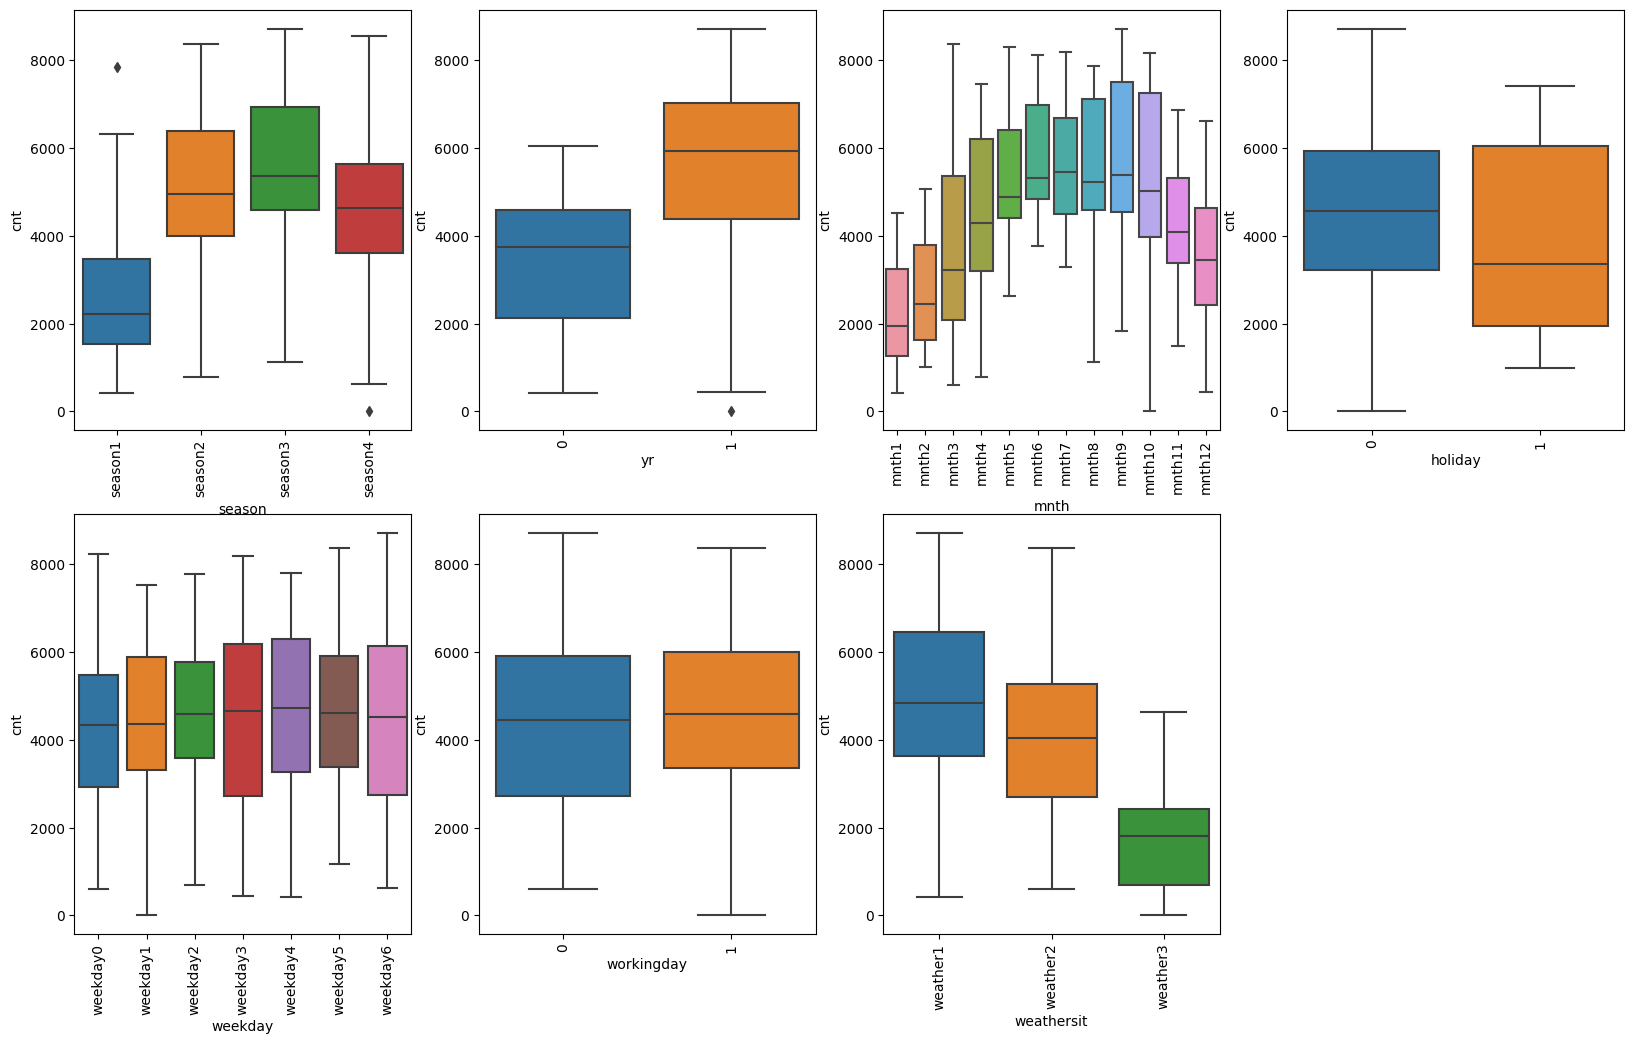

In [23]:
# visualise the categorical variable

plt.figure(figsize=(20,12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=bike_rentals)
plt.xticks(rotation=90)

plt.subplot(2, 4, 2)
sns.boxplot(x='yr', y='cnt', data=bike_rentals)
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
sns.boxplot(x='mnth', y='cnt', data=bike_rentals)
plt.xticks(rotation=90)

plt.subplot(2, 4, 4)
sns.boxplot(x='holiday', y='cnt', data=bike_rentals)
plt.xticks(rotation=90)

plt.subplot(2, 4, 5)
sns.boxplot(x='weekday', y='cnt', data=bike_rentals)
plt.xticks(rotation=90)

plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=bike_rentals)
plt.xticks(rotation=90)

plt.subplot(2, 4, 7)
sns.boxplot(x='weathersit', y='cnt', data=bike_rentals)
plt.xticks(rotation=90)
plt.show()


From the above representation of pairplot we can see that there are few variables drasatic effect on the target variable cnt like season, weathersit, year and month.

Thus we can go ahead with linear regression for this problem statement

In [24]:
# Dropping the original variables for which we created dummy variables

bike_rentals = bike_rentals.drop(['season', 'weathersit', 'weekday', 'mnth'], axis=1)
bike_rentals.head()



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season2,season3,...,mnth9,mnth10,mnth11,mnth12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


### Split the data into train-test

In [25]:
df_train, df_test = train_test_split(bike_rentals, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling the features

We will use Min-Max Scaling (normalisation) for scaling the features

In [26]:
# Rescaling the features using normalisation

# 1. Instantiate the object
scaler = MinMaxScaler()

# create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season2,season3,...,mnth9,mnth10,mnth11,mnth12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,0,0,1,0


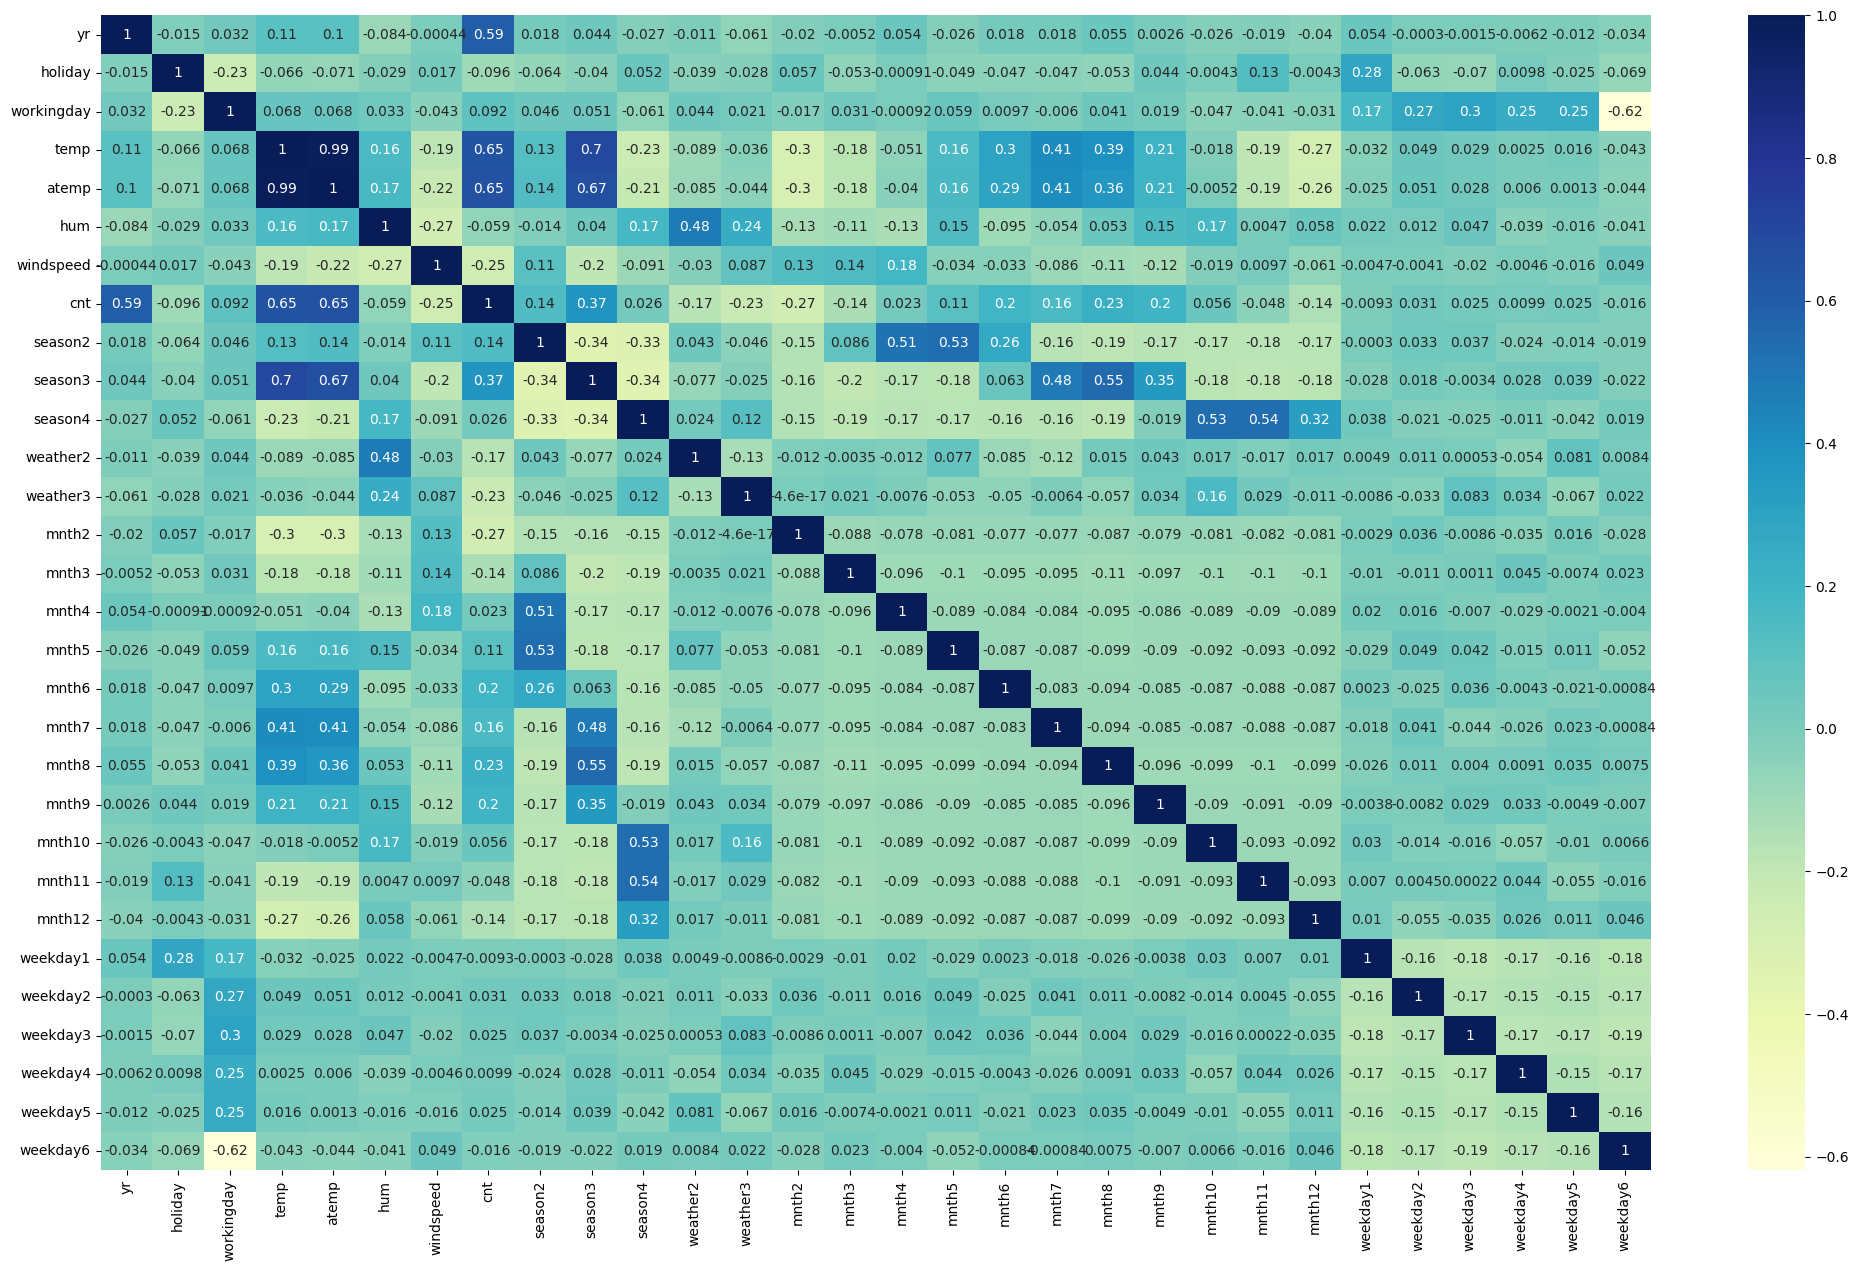

In [27]:
# heatmap to show correlation between variables

plt.figure(figsize=(25, 15))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

- From the above variable we can see which all variables are multicollinear with the target variable.
- We will use VIF in order to check the multicollinearity and deal with it.

### Training the model

In [28]:
 # create X_train and y_train

y_train = df_train.pop('cnt')
X_train = df_train

print(X_train.head())
print(y_train.head())

     yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           1  0.345824  0.318819  0.751824   0.380981   

     season2  season3  season4  ...  mnth9  mnth10  mnth11  mnth12  weekday1  \
576        0        1        0  ...      0       0       0       0         0   
426        0        0        0  ...      0       0       0       0         0   
728        0        0        0  ...      0       0       0       1         0   
482        1        0        0  ...      0       0       0       0         0   
111        1        0        0  ...      0       0       0       0         0   

     weekday2  weekday3  weekday4  weekday5  weekday6  
576         1         0 

### Adding all variables to the model at once and removing one variable at a time

In [29]:
# build a model with all the variables
X_train_sm = sm.add_constant(X_train)

# create a model
lr = sm.OLS(y_train, X_train_sm)

# fit the model
lr_model = lr.fit()

# params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          2.81e-180
Time:                        06:05:39   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1758      0.030      5.774      0.000       0.116       0.236
yr             0.2325      0.008     28.794      0.000       0.217       0.248
holiday       -0.0416      0.024     -1.758      0.079      -0.088       0.005
workingday     0.0438      0.009      4.666      0.000       0.025       0.062
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0590      0.138      0.426      0.670      -0.213       0.331
hum           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season2        0.0877      0.024      3.713      0.000       0.041       0.134
season3        0.0454      0.030      1.511      0.131      -0.014       0.104
season4        0.1524      0.026      5.866      0.000       0.101       0.203
weather2      -0.0595      0.010     -5.701      0.000      -0.080      -0.039
weather3      -0.2550      0.026     -9.631      0.000      -0.307      -0.203
mnth2          0.0307      0.021      1.489      0.137      -0.010       0.071
mnth3          0.0646      0.022      2.886      0.004       0.021       0.109
mnth4          0.0631      0.034      1.876      0.061      -0.003       0.129
mnth5          0.0886      0.036      2.446      0.015       0.017       0.160
mnth6          0.0691      0.039      1.776      0.076      -0.007       0.145
mnth7          0.0304      0.044      0.692      0.489      -0.056       0.117
mnth8          0.0853      0.042      2.038      0.042       0.003       0.168
mnth9          0.1498      0.037      4.006      0.000       0.076       0.223
mnth10         0.0708      0.035      2.050      0.041       0.003       0.139
mnth11         0.0232      0.033      0.707      0.480      -0.041       0.088
mnth12         0.0188      0.027      0.708      0.479      -0.033       0.071
weekday1      -0.0101      0.010     -1.033      0.302      -0.029       0.009
weekday2      -0.0069      0.011     -0.616      0.538      -0.029       0.015
weekday3       0.0057      0.011      0.538      0.591      -0.015       0.026
weekday4       0.0018      0.011      0.168      0.867      -0.020       0.023
weekday5       0.0116      0.011      1.029      0.304      -0.011       0.034
weekday6       0.0542      0.015      3.729      0.000       0.026       0.083
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     7.98e+15
==============================================================================

N

1. Look at the significance of a variable  (p-values)
2. VIF

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season2', False, 2),
 ('season3', False, 2),
 ('season4', True, 1),
 ('weather2', False, 2),
 ('weather3', True, 1),
 ('mnth2', False, 2),
 ('mnth3', False, 2),
 ('mnth4', False, 2),
 ('mnth5', False, 2),
 ('mnth6', False, 2),
 ('mnth7', False, 2),
 ('mnth8', False, 2),
 ('mnth9', True, 1),
 ('mnth10', False, 2),
 ('mnth11', False, 2),
 ('mnth12', False, 2),
 ('weekday1', True, 1),
 ('weekday2', True, 1),
 ('weekday3', True, 1),
 ('weekday4', True, 1),
 ('weekday5', True, 1),
 ('weekday6', False, 2)]

In [32]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season4',
       'weather3', 'mnth9', 'weekday1', 'weekday2', 'weekday3', 'weekday4',
       'weekday5'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season2', 'season3', 'weather2', 'mnth2', 'mnth3', 'mnth4',
       'mnth5', 'mnth6', 'mnth7', 'mnth8', 'mnth10', 'mnth11', 'mnth12',
       'weekday6'],
      dtype='object')

In [34]:
X_train_rfe = X_train[col]

### VIF

- - A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis.

In [35]:
# create a df that will contains the name of all the feature variables and their respective VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday1,inf
10,weekday2,inf
11,weekday3,inf
12,weekday4,inf
13,weekday5,inf
4,hum,10.78
3,temp,7.14
5,windspeed,3.53


In [36]:
# Dropping weekday 4

X = X_train_rfe.drop('weekday4', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [37]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     159.3
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.42e-167
Time:                        06:05:40   Log-Likelihood:                 458.15
No. Observations:                 510   AIC:                            -888.3
Df Residuals:                     496   BIC:                            -829.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2563      0.029      8.892      0.000       0.200       0.313
yr             0.2271      0.009     25.300      0.000       0.210       0.245
holiday       -0.0830      0.032     -2.585      0.010      -0.146      -0.020
workingday     0.0170      0.015      1.162      0.246      -0.012       0.046
temp           0.6082      0.021     28.342      0.000       0.566       0.650
hum           -0.2550      0.034     -7.523      0.000      -0.322      -0.188
windspeed     -0.1778      0.028     -6.365      0.000      -0.233      -0.123
season4        0.1170      0.011     10.712      0.000       0.096       0.138
weather3      -0.2045      0.028     -7.386      0.000      -0.259      -0.150
mnth9          0.0769      0.017      4.564      0.000       0.044       0.110
weekday1      -0.0074      0.017     -0.438      0.662      -0.041       0.026
weekday2      -0.0066      0.017     -0.383      0.702      -0.041       0.027
weekday3       0.0069      0.016      0.420      0.675      -0.025       0.039
weekday5       0.0027      0.017      0.157      0.875      -0.031       0.037
==============================================================================
Omnibus:                       35.064   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.656
Skew:                          -0.451   Prob(JB):                     2.48e-14
Kurtosis:                       4.462   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
4,hum,10.78
2,workingday,7.15
3,temp,7.14
5,windspeed,3.53
9,weekday1,2.21
11,weekday3,2.20
0,yr,2.03
10,weekday2,2.00
12,weekday5,1.97
6,season4,1.49


In [39]:
# Dropping weekday 3

X = X.drop('weekday3', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [40]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     172.9
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.15e-168
Time:                        06:05:40   Log-Likelihood:                 458.06
No. Observations:                 510   AIC:                            -890.1
Df Residuals:                     497   BIC:                            -835.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2559      0.029      8.890      0.000       0.199       0.312
yr             0.2272      0.009     25.324      0.000       0.210       0.245
holiday       -0.0798      0.031     -2.560      0.011      -0.141      -0.019
workingday     0.0208      0.012      1.794      0.073      -0.002       0.044
temp           0.6082      0.021     28.367      0.000       0.566       0.650
hum           -0.2543      0.034     -7.517      0.000      -0.321      -0.188
windspeed     -0.1778      0.028     -6.369      0.000      -0.233      -0.123
season4        0.1169      0.011     10.715      0.000       0.096       0.138
weather3      -0.2043      0.028     -7.387      0.000      -0.259      -0.150
mnth9          0.0768      0.017      4.564      0.000       0.044       0.110
weekday1      -0.0111      0.014     -0.767      0.443      -0.040       0.017
weekday2      -0.0104      0.015     -0.704      0.482      -0.039       0.019
weekday5      -0.0010      0.015     -0.068      0.946      -0.030       0.028
==============================================================================
Omnibus:                       35.499   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.956
Skew:                          -0.458   Prob(JB):                     2.13e-14
Kurtosis:                       4.457   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
4,hum,10.77
3,temp,7.13
2,workingday,4.44
5,windspeed,3.53
0,yr,2.03
9,weekday1,1.62
6,season4,1.49
10,weekday2,1.46
11,weekday5,1.45
1,holiday,1.25


In [42]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
4,hum,10.77
3,temp,7.13
2,workingday,4.44
5,windspeed,3.53
0,yr,2.03
9,weekday1,1.62
6,season4,1.49
10,weekday2,1.46
11,weekday5,1.45
1,holiday,1.25


In [43]:
# Dropping weekday 3

X = X.drop('hum', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [44]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     165.1
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          3.20e-158
Time:                        06:05:40   Log-Likelihood:                 430.60
No. Observations:                 510   AIC:                            -837.2
Df Residuals:                     498   BIC:                            -786.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0902      0.020      4.622      0.000       0.052       0.129
yr             0.2334      0.009     24.779      0.000       0.215       0.252
holiday       -0.0719      0.033     -2.187      0.029      -0.136      -0.007
workingday     0.0214      0.012      1.749      0.081      -0.003       0.045
temp           0.5843      0.022     26.138      0.000       0.540       0.628
windspeed     -0.1265      0.029     -4.432      0.000      -0.183      -0.070
season4        0.1033      0.011      9.106      0.000       0.081       0.126
weather3      -0.2581      0.028     -9.164      0.000      -0.313      -0.203
mnth9          0.0645      0.018      3.651      0.000       0.030       0.099
weekday1      -0.0156      0.015     -1.024      0.306      -0.046       0.014
weekday2      -0.0131      0.016     -0.845      0.399      -0.044       0.017
weekday5      -0.0023      0.016     -0.147      0.883      -0.033       0.029
==============================================================================
Omnibus:                       36.074   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.753
Skew:                          -0.519   Prob(JB):                     1.29e-12
Kurtosis:                       4.225   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
2,workingday,4.19
3,temp,4.06
4,windspeed,3.05
0,yr,2.02
8,weekday1,1.62
9,weekday2,1.46
10,weekday5,1.45
5,season4,1.26
1,holiday,1.24
7,mnth9,1.15


In [46]:
# Dropping weekday 5

X = X.drop('weekday5', axis=1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [47]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     181.9
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          2.34e-159
Time:                        06:05:40   Log-Likelihood:                 430.59
No. Observations:                 510   AIC:                            -839.2
Df Residuals:                     499   BIC:                            -792.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0902      0.020      4.625      0.000       0.052       0.129
yr             0.2334      0.009     24.807      0.000       0.215       0.252
holiday       -0.0726      0.032     -2.235      0.026      -0.136      -0.009
workingday     0.0207      0.011      1.842      0.066      -0.001       0.043
temp           0.5843      0.022     26.163      0.000       0.540       0.628
windspeed     -0.1265      0.029     -4.437      0.000      -0.183      -0.070
season4        0.1033      0.011      9.117      0.000       0.081       0.126
weather3      -0.2578      0.028     -9.199      0.000      -0.313      -0.203
mnth9          0.0645      0.018      3.659      0.000       0.030       0.099
weekday1      -0.0149      0.014     -1.032      0.303      -0.043       0.013
weekday2      -0.0124      0.015     -0.842      0.400      -0.041       0.017
==============================================================================
Omnibus:                       36.239   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.930
Skew:                          -0.521   Prob(JB):                     1.18e-12
Kurtosis:                       4.225   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual analysis

In [48]:
y_train_cnt = lr_4.predict(X_train_lm)

<ipython-input-49-d0955985884c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

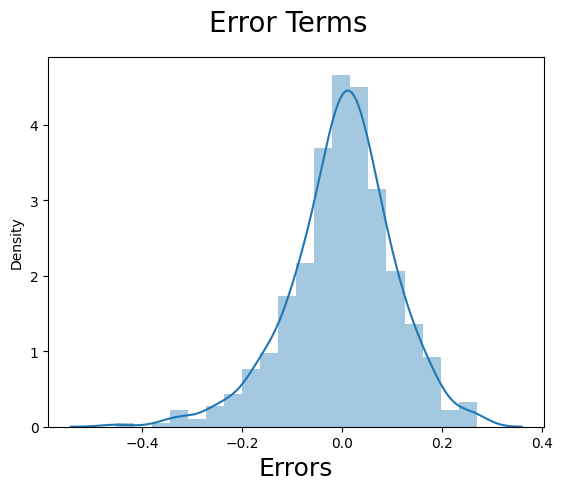

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)

### Prediction and evaluation on test dataset

In [50]:
# Rescaling the features using normalisation

# create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# 2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season2,season3,...,mnth9,mnth10,mnth11,mnth12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,0,0,1,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
df_test.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season2,season3,...,mnth9,mnth10,mnth11,mnth12,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.086364,0.086364,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.281541,0.281541,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
y_test = df_test.pop('cnt')
X_test = df_test

In [53]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [55]:
y_pred_m4 = lr_4.predict(X_test_m4)

In [54]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['weekday3', 'weekday4', 'weekday5', 'hum', 'atemp', 'season2', 'season3', 'weather2', 'mnth2', 'mnth3', 'mnth4',
       'mnth5', 'mnth6', 'mnth7', 'mnth8', 'mnth10', 'mnth11', 'mnth12',
       'weekday6'], axis = 1)

In [59]:
X_test_m4.head()

,const,yr,holiday,workingday,temp,windspeed,season4,weather3,mnth9,weekday1,weekday2
184,1.0,0,1,0,0.831783,0.084219,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.153728,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.334206,1,0,0,0,0
221,1.0,0,0,1,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.537414,0,0,0,0,0


Text(0, 0.5, 'y_pred')

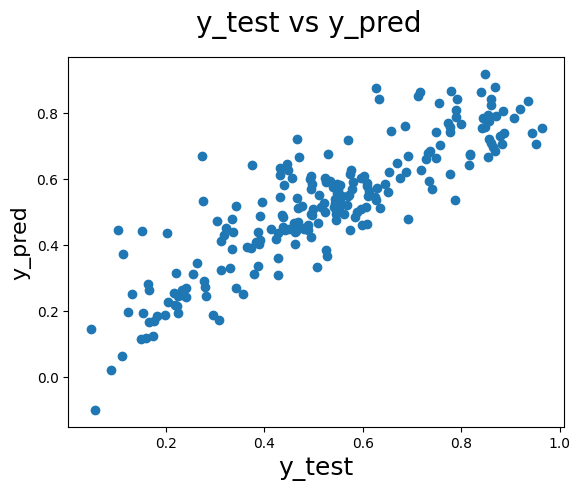

In [56]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### R2 Score

In [58]:
r2_score(y_test, y_pred_m4)

0.7556882909283967